# Cuadrados mínimos lineal - modelo cuadrático

<ol>
<li>Modelo lineal</li>
<li>Modelo cuadrático</li>
<li>Reparametrización</li>
</ol>

In [1]:
%matplotlib notebook

In [2]:
import math
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.stats import chi2

## Datos

In [3]:
archivo_entrada = 'beta.dat'

In [4]:
datos = np.loadtxt(archivo_entrada)
datos

array([[1.02      , 2.24327   , 0.00831886],
       [1.06      , 2.21686   , 0.00797227],
       [1.1       , 2.20075   , 0.00998714],
       [1.14      , 2.17497   , 0.00938547],
       [1.18      , 2.13199   , 0.0105196 ],
       [1.22      , 2.11644   , 0.0158722 ],
       [1.26      , 2.08321   , 0.0185    ],
       [1.3       , 2.01585   , 0.0209518 ],
       [1.34      , 2.00369   , 0.0167014 ]])

In [5]:
xdata = datos.T[0]
ydata = datos.T[1]
ysigma = datos.T[2]

<IPython.core.display.Javascript object>


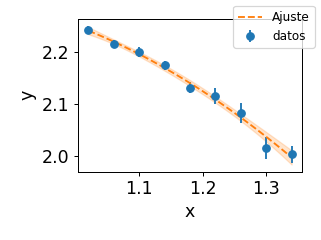

<ErrorbarContainer object of 3 artists>

In [6]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.errorbar(xdata, ydata, ysigma,ls='none', marker='o', label='datos')

# Solución ecuaciones normales

In [7]:
def linear_least_squares(x, y, ysigma, A):
    
    # parameter estimators
    V = np.diag(ysigma*ysigma)
    cova = inv( A.T @ inv(V) @ A )
    B = cova @ A.T @ inv(V)
    theta_est = B @ ydata
    
    # parameter errors
    errors = np.sqrt( np.diagonal(cova) )
    corr = cova / np.tensordot(errors,errors, axes=0)
    
    # goodness of fit
    C = ydata - A @ theta_est
    chi2_min = C.T @ inv(V) @ C
    ndof = len(x) - len(theta_est)
    pvalue = chi2.sf(chi2_min, ndof)
    
    return {'est': theta_est, 'errors': errors, 'cova': cova, 'corr': corr, 'chi2_min': chi2_min, 'ndof': ndof, 'pvalue': pvalue} 

## Modelo

Modelo lineal

In [8]:
def model_matrix1(x):
    return np.column_stack([x**0, x])

Modelo cuadrático

In [9]:
def model_matrix2(x):
    return np.column_stack([x**0, x**1, x**2])

Modelo cuadrático con origen corrido

In [10]:
def model_matrix3(x):
    return np.column_stack([x**0, (x-1.2)**1, (x-1.2)**2])

Selecciono el modelo

In [11]:
model_matrix = model_matrix2

In [12]:
A = model_matrix(xdata)
A

array([[ 1.00e+00, -1.80e-01,  3.24e-02],
       [ 1.00e+00, -1.40e-01,  1.96e-02],
       [ 1.00e+00, -1.00e-01,  1.00e-02],
       [ 1.00e+00, -6.00e-02,  3.60e-03],
       [ 1.00e+00, -2.00e-02,  4.00e-04],
       [ 1.00e+00,  2.00e-02,  4.00e-04],
       [ 1.00e+00,  6.00e-02,  3.60e-03],
       [ 1.00e+00,  1.00e-01,  1.00e-02],
       [ 1.00e+00,  1.40e-01,  1.96e-02]])

## Ajuste

In [13]:
res = linear_least_squares(xdata, ydata, ysigma, A)
res

{'est': array([ 2.12527207, -0.79732439, -0.8253585 ]),
 'errors': array([0.00584235, 0.05342921, 0.41649271]),
 'cova': array([[ 3.41330708e-05,  2.36969323e-05, -1.33377946e-03],
        [ 2.36969323e-05,  2.85467996e-03,  1.41137377e-02],
        [-1.33377946e-03,  1.41137377e-02,  1.73466181e-01]]),
 'corr': array([[ 1.        ,  0.07591467, -0.54813677],
        [ 0.07591467,  1.        ,  0.63424334],
        [-0.54813677,  0.63424334,  1.        ]]),
 'chi2_min': 3.0258133282717194,
 'ndof': 6,
 'pvalue': 0.8056000818372366}

In [14]:
estimadores = res['est']
print(f'Estimadores: {estimadores}')

Estimadores: [ 2.12527207 -0.79732439 -0.8253585 ]


In [15]:
errores = res['errors']
print(f'Errores: {errores}')

Errores: [0.00584235 0.05342921 0.41649271]


In [16]:
cova = res['cova']
cova

array([[ 3.41330708e-05,  2.36969323e-05, -1.33377946e-03],
       [ 2.36969323e-05,  2.85467996e-03,  1.41137377e-02],
       [-1.33377946e-03,  1.41137377e-02,  1.73466181e-01]])

## Figura

In [17]:
x = np.linspace( xdata.min(), xdata.max(), 100)
A1 = model_matrix(x)
mu_est = A1 @ estimadores
ax1.plot(x, mu_est, ls='--', label='Ajuste')

Banda de error

In [20]:
var_mu_est = np.einsum("ki,ij,kj->k", A1, cova, A1)
sigma_mu_est = np.sqrt(var_mu_est)
ax1.fill_between(x, mu_est-sigma_mu_est, mu_est+sigma_mu_est, color='tab:orange', alpha=0.2)

In [23]:
fig1.legend()
fig1.savefig('cml2.svg')